The goal of this paper is to try to explain how the market value of a soccer player changes with respect to certain skills, such as passing ability, shooting ability, or age.
To do so, the following will be considered: the simple linear regression model, the Polynomial regression model, the regularized Ridge, and Lasso regression models. In conclusion, an analysis of the results obtained will be made. The data used are from Kaggle's "FIFA 23" dataset.

In [ ]:
#importo pacchetti necessari 

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from google.colab import drive
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


***1 Data used***


The data used refers to 18538 soccer players

In this section, the data are imported, the variable "preferred foot" is transfromed into a dummy variable, after which the correlation plots and pairplots of each variable of X (regressors) versus variable Y (target) are analyzed

In [ ]:
df0 = pd.read_excel('/content/drive/MyDrive/Fifa 23 Players Data update.xlsx', header=0)

pd.DataFrame.dropna(df0)

df = df0.drop(df0[df0['Value(in Euro)'] == 0].index)

# Sostituisco "Right" con 0 e "Left" con 1 nella colonna "Piede preferito"
df['Preferred Foot'] = df['Preferred Foot'].replace({"Right": 1, "Left": 2})

df

,Known As,Value(in Euro),Overall,Potential,Age,Height(in cm),Weight(in kg),Preferred Foot,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,GK Rating
0,L. Messi,54000000,91,91,35,169,67,2,81,89,90,94,34,64,22
1,K. Benzema,64000000,91,91,34,185,81,1,80,88,83,87,39,78,21
2,R. Lewandowski,84000000,91,91,33,185,81,1,75,91,79,86,44,83,22
3,K. De Bruyne,107500000,91,91,31,181,70,1,74,88,93,87,64,77,24
4,K. Mbappé,190500000,91,95,23,182,73,1,97,89,80,92,36,76,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,110000,47,56,21,174,68,1,68,48,43,51,31,33,15
18535,Yang Dejiang,90000,47,57,17,175,60,1,55,37,41,47,48,39,15
18536,L. Mullan,130000,47,67,18,170,65,1,64,40,49,52,37,35,17
18537,D. McCallion,100000,47,61,17,178,65,1,52,24,25,32,52,41,15


In [ ]:
df.shape

(18435, 15)

In [ ]:
df.describe()

,Value(in Euro),Overall,Potential,Age,Height(in cm),Weight(in kg),Preferred Foot,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,GK Rating
count,"18,435.00","18,435.00","18,435.00","18,435.00","18,435.00","18,435.00","18,435.00","18,435.00","18,435.00","18,435.00","18,435.00","18,435.00","18,435.00","18,435.00"
mean,"2,891,683.15",65.83,71.01,25.22,181.55,75.17,1.24,68.01,53.75,58.01,63.09,50.23,64.76,23.23
std,"7,653,572.38",6.79,6.20,4.70,6.86,7.01,0.43,10.64,13.61,9.72,9.33,16.39,9.58,15.07
min,"9,000.00",47.00,48.00,16.00,155.00,49.00,1.00,28.00,16.00,25.00,28.00,15.00,30.00,10.00
25%,"500,000.00",62.00,67.00,21.00,177.00,70.00,1.00,62.00,44.00,52.00,58.00,36.00,58.00,17.00
50%,"1,000,000.00",66.00,71.00,25.00,182.00,75.00,1.00,68.00,56.00,58.00,64.00,54.00,66.00,18.00
75%,"2,000,000.00",70.00,75.00,29.00,186.00,80.00,1.00,75.00,64.00,64.00,69.00,63.00,72.00,20.00
max,"190,500,000.00",91.00,95.00,44.00,206.00,105.00,2.00,97.00,92.00,93.00,94.00,91.00,91.00,90.00


<ipython-input-140-7cfdea54cf4a>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


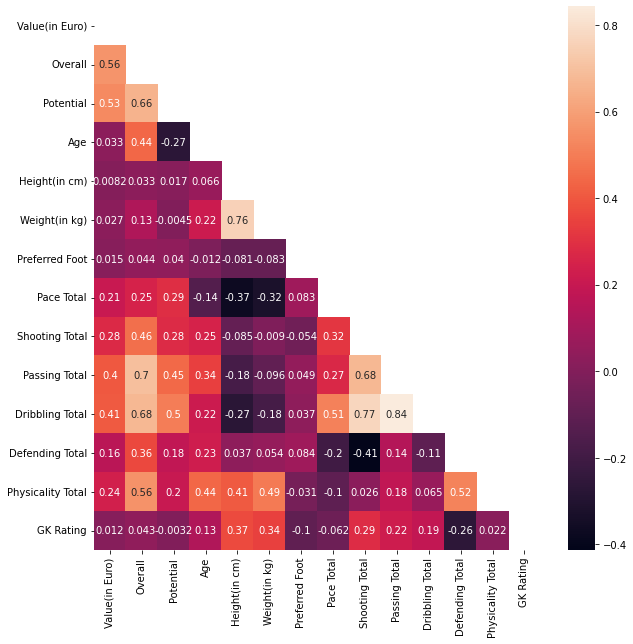

In [ ]:
corr = df.corr()

# Crea la maschera di boolean --> visualizzare solo dati sopra diagonale
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask, annot=True)




1 --> variables that seem to have the most influence are dribling, shooting, potential, overall, and passing. These variables show a positive correlation, so, as is logical to expect, as a player's dribling ability increases, so will his value. We can also see that the correlation coefficient between market value and dirbilng is greater than that of defensive skills, so we can hypothesize that the model "tends to prefer" more offensive players.

2 --> on the contrary, the correlations of age and gk rating with the target variable are very low, despite this we cannot eliminate these variabli. in fact, it comes logical to think that age influences the market value of a player. as for the gk rating, if we eliminated it, we would risk introducing a bias in the estimation of the market value of goalkeepers




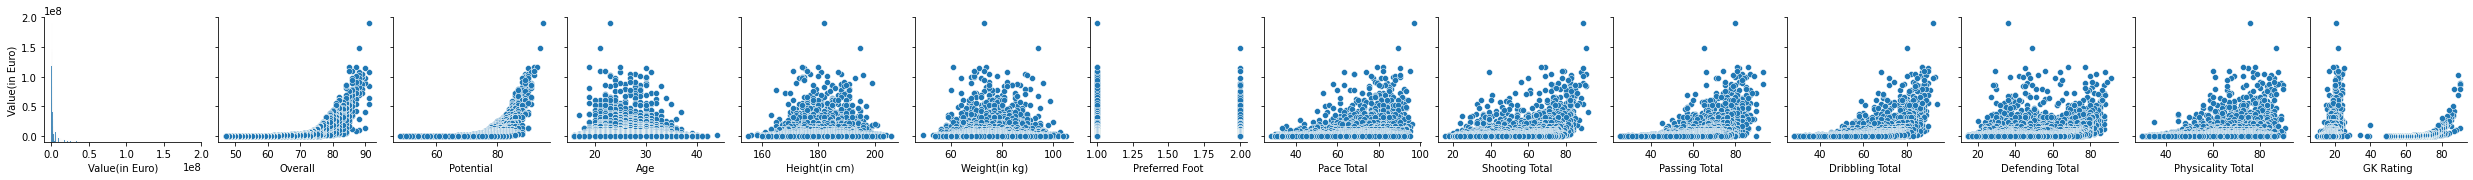

In [ ]:

sns.pairplot(df, y_vars="Value(in Euro)")


from the pairplots we can see how almost all the relationships turn out to be exponential, this suggests that we will have a small group of players with a very high value compared to the others.

In [ ]:
from numpy import random
random.seed(0)

*** 2 linear regression ***

in this section, after dividing the dataset into test and train set, we will try to estimate the first linear regression model, commenting on the results obtained at the same time. 

In [ ]:
#set di training e set di test

y = df.iloc[:, 1]
X = df.iloc[:, 2:15]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

print(f'Traning Data Shape: {X_train.shape,y_train.shape} ,TEST Data Shape:{X_test.shape,y_test.shape}')

Traning Data Shape: ((13826, 13), (13826,)) ,TEST Data Shape:((4609, 13), (4609,))


**LINEAR** **REGRESSION**

In [ ]:
# REGRESSIONE LINEARE SEMPLICE CON SK-LEARN

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
# R-SQUARED

r2 = r2_score(y_test, y_pred)
print(f'Coefficiente di determinazione: {r2:.2f}')



Coefficiente di determinazione: 0.39


for our first model we get an r^2 of 0.39, which indicates that only 39% of the variance of our y is explained by our regressors. This index turns out to be very low so let us first proceed with better analyzing the results of this model and afterwards trying to make the model more complex to better explain our target variable. 

In [ ]:
#MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

NameError: ignored

the MSE also turns out to be very high, which confirms that we are in the presence of underfitting, that is, we have a bias given by the wrong choice of the model. 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


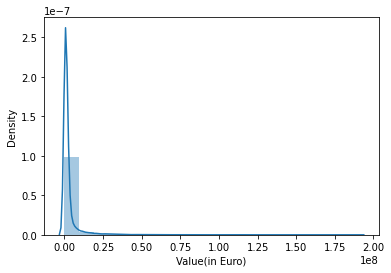

In [ ]:
%matplotlib inline
import seaborn as sns  


#plt.hist(,bins=20)

sns.distplot(y,bins=20) 

also analyzing the density of our y variable, we see how it is very right shifted with a very heavy left tail, leading it to be well away from a normal distribution.

This model does not "fit" the data well, so we try to transform the target variable with a logarithmic transformation in order to make this relationship more linear.

**SEZIONE 3**

In this section, we will try to logarithmically trafrom the target variable and estimate a new linear regression model on it. 

**Seconda regressione lineare (y log)**

In [ ]:
YLOG=np.log(y)
YLOG

0       17.80
1       17.97
2       18.25
3       18.49
4       19.07
         ... 
18534   11.61
18535   11.41
18536   11.78
18537   11.51
18538   11.00
Name: Value(in Euro), Length: 18435, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


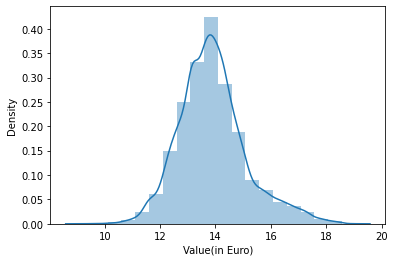

In [ ]:
%matplotlib inline
import seaborn as sns  

#plt.hist(,bins=20)

sns.distplot(YLOG,bins=20) 

the density of the new target variable seems to be much more similar to a Gaussian than seen previously, which makes us think that the logarithmic transfomation might be the correct transformation.

will now proceed with manipulating the dataset, which because of our Y transformation presents some problems:

In [ ]:
df2 = df.drop(columns=['Value(in Euro)'])
df2= df2.assign(ylog=YLOG)

In [ ]:
# valori infiti o nulli?
null_or_infinite = df2.isnull() | df2.isin([np.inf, -np.inf])
print(null_or_infinite.sum().sum())

0


In [ ]:
# Elimina le righe che contengono valori nulli o infiniti
df2.dropna()
df2[~df2.isin([np.inf, -np.inf]).any(1)]

,Known As,Overall,Potential,Age,Height(in cm),Weight(in kg),Preferred Foot,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,GK Rating,ylog
0,L. Messi,91,91,35,169,67,2,81,89,90,94,34,64,22,17.80
1,K. Benzema,91,91,34,185,81,1,80,88,83,87,39,78,21,17.97
2,R. Lewandowski,91,91,33,185,81,1,75,91,79,86,44,83,22,18.25
3,K. De Bruyne,91,91,31,181,70,1,74,88,93,87,64,77,24,18.49
4,K. Mbappé,91,95,23,182,73,1,97,89,80,92,36,76,21,19.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,47,56,21,174,68,1,68,48,43,51,31,33,15,11.61
18535,Yang Dejiang,47,57,17,175,60,1,55,37,41,47,48,39,15,11.41
18536,L. Mullan,47,67,18,170,65,1,64,40,49,52,37,35,17,11.78
18537,D. McCallion,47,61,17,178,65,1,52,24,25,32,52,41,15,11.51


In [ ]:
y2 = df2.iloc[:,14]
X2 = df2.iloc[:, 1:13]

# splittiamo di nuovo il dataset perchè abbiamo cancellato alcune righe e abbiamo trasformato la variabile y 

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=55)

print(f'Traning Data Shape: {X_train2.shape,y_train2.shape} ,TEST Data Shape:{X_test2.shape,y_test2.shape}')

Traning Data Shape: ((13826, 12), (13826,)) ,TEST Data Shape:((4609, 12), (4609,))


again through sk-learn we estimate the new model, and use statsmodel to get a more detailed summary:

In [ ]:
#modello 2 con sklearn

model2 = LinearRegression()

model2.fit(X_train2, y_train2)

y_pred2 = model2.predict(X_test2)

In [ ]:
#visto che sklearn non ha un summary usiamo stasmodel

from statsmodels.regression.linear_model import OLS
model2_sm = OLS(y_train2, X_train2)
results = model2_sm.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   ylog   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.141e+06
Date:                Thu, 12 Jan 2023   Prob (F-statistic):                        0.00
Time:                        20:42:25   Log-Likelihood:                         -1361.1
No. Observations:               13826   AIC:                                      2746.
Df Residuals:                   13814   BIC:                                      2837.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [ ]:
# MSE

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


MSE_ylog= mean_squared_error(y_test2, y_pred2)
print(MSE_ylog)

0.059397394758334804


we can analyze the table shown above:

we get a significantly better R^2 and MSE so by increasing the complexity of the model obviously this will better describe our data (later we will do a check on the generalization ability of this model, which turns out to be a very important feature to evaluate).

Looking at the weights/coefficients (theta) of our regressors we observe some noteworthy results:

age turns out to have a negative impact, meaning that as age increases a player will tend to lose value (quite logical)
we observe the same result for weight (obviously). 

The surprising result, on the other hand, concerns a player's passing skills, which negatively impact our y. This result, however, is consistent with what we observed for dribling (postively correlated) leaving us to guess, as seen above, that our model tends to prefer players who are more individualistic tactically.
The variable with the greatest impact, however, is player pace. Players with a higher intensity of play will have higher value.


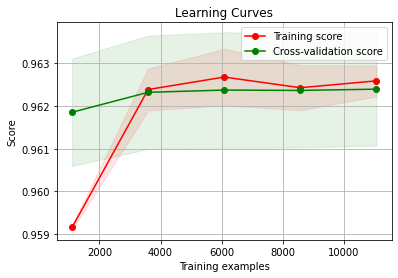

In [ ]:
#learning curves 

from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(model2, X_train2, y_train2, cv=5)

import matplotlib.pyplot as plt

plt.figure()
plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Score")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()


The graph above shows the learning curves of our model, which express the MSEs of our model on the train and test set as a function of sample numerosity. 
these are a great way to graphically visualize the bias|variance trade off. 
Obviously at first, for fewer observations, there will be a larger variance between the two MSEs, indicating that with little data the model does not generalize well. As the numerosity increases, the two lines get closer and reach a plateau, at a very good level of MSE, indicating that our model generalizes well and has no bias rigurd the wrong choice of model. 

**SEZIONE 4**

in this section, polynomial regression will be introduced to complete our analysis, although the results achieved are satisfactory. the idea of this type of regression is to be able to linearly explain a dataset that does not turn out to have a linear relationship, by including the squared regressors and their interactions.

a polynomial regression of degree 2,3,4 will be done, and after comparing the R^2 and the MSE, the one deemed most suitable will be chosen.

**POLYNOMIAL REGRESSION**

In [ ]:
#POLYNOMIAL REGRESSION, CREANDO LISTA CON MSE E R^2 DI TEST E TRAIN PER CONFRONTARLI
MSE = []
R2 = []
MSE_train = []
R2_train = []

for i in range(1,5):
   
    poly = PolynomialFeatures(degree=i)

    X_train_poly = poly.fit_transform(X_train2)

   
    model3 = LinearRegression()


    model3.fit(X_train_poly, y_train2)


    X_test_poly = poly.transform(X_test2)

   
    y_pred3 = model3.predict(X_test_poly)

   
    MSE.append(mean_squared_error(y_test2, y_pred3))
    R2.append(r2_score(y_test2, y_pred3))
    
 
    MSE_train.append(mean_squared_error(y_train2, model3.predict(X_train_poly)))
    R2_train.append(r2_score(y_train2, model3.predict(X_train_poly)))




In [ ]:
metrics = {'degree': list(range(1,5)),
           'MSE': MSE,
           'R2': R2,
           'MSE_train': MSE_train,
           'R2_train': R2_train}


metrics_df = pd.DataFrame(metrics)


print(metrics_df)


   degree       MSE        R2  MSE_train  R2_train
0       1  0.059397  0.960836   0.056844  0.962584
1       2  0.025818  0.982977   0.025048  0.983513
2       3  0.022256  0.985326   0.020077  0.986785
3       4  0.019127  0.987389   0.012779  0.991589



in the table we can see the MSE for the training and test set for each degree of our polynomial regression.

Comparing the results obtained we see that these are all very similar, but the third degree seems to be the degree to have a trade off between explanation of the data and generalization of the best model.

**SEZIONE 5**

In this section, (for clarity of analysis) we will try to implement a regularized regression (both ridge and lasso) in order to reduce the (already very low) overfitting of our polynomial regression model. the idea of this type of regression in fact is precisely to manipulate the weights of the polynomial regression (via the alpha hyperparameter) pushing them to be lower. 

**regularized regression**




**LASSO**

In [ ]:
#lasso 

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_poly, y_train2)
y_pred_lasso = lasso_reg.predict(X_test_poly)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.795e+02, tolerance: 2.100e+00
  model = cd_fast.enet_coordinate_descent(


In [ ]:
#mse e r^2 lasso

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


MSE_lasso= mean_squared_error(y_test2, y_pred_lasso)
R2_lasso= r2_score(y_test2, y_pred_lasso)

print(R2_lasso,MSE_lasso)

0.9824268286883115 0.026652030353289304


**RIDGE**

In [ ]:
#ridge 
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_train_poly, y_train2)
y_pred_ridge = ridge_reg.predict(X_test_poly)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.0576e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [ ]:
#r^2 e mse ridge
MSE_ridge= mean_squared_error(y_test2, y_pred_ridge)
R2_ridge = r2_score(y_test2, y_pred_ridge)

print(MSE_ridge,R2_ridge)

0.019427697810002004 0.9871902343918522


he isults obtained are very similar, however, the MSE of the ridge turns out to be lower so we continue with this approach. 

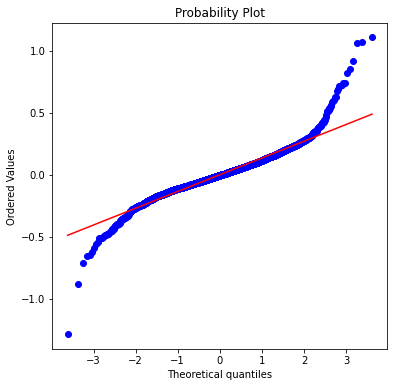

In [ ]:
#analisi residui 
from scipy.stats import probplot

residuals= y_pred_ridge-y_test2

_, (ax1) = plt.subplots(1, 1, figsize=(6, 6))
probplot(residuals, plot=ax1)
plt.show()


Analyzing the Q-Q plot of the residuals we notice the presence of some outliers, but despite this they are "pretty linear," so our model fits our data well.




***SECTION 6 (ANALYSIS OF RESULTS)***

at this point a ridge regression model has been selected, in this last section we will analyze the results obtained in the following order:
final analysis
predicted vs original value





in this last part, we will proceed to return the variable y to its original form and to comment on the reuslts.

In [ ]:
originalyTRAIN=np.exp(y_train2)
originalyTEST=np.exp(y_test2)

print(originalyTRAIN)




14477     475,000.00
13975     425,000.00
11220     725,000.00
3868    1,800,000.00
15047     325,000.00
            ...     
15259     250,000.00
10294   1,500,000.00
16353     325,000.00
17455     240,000.00
4815    2,300,000.00
Name: ylog, Length: 13826, dtype: float64


In [ ]:
#ridge con y originale
from sklearn.linear_model import Ridge
ridge_reg2 = Ridge(alpha=0.1)
ridge_reg2.fit(X_train_poly, originalyTRAIN)
y_pred_ridge2 = ridge_reg2.predict(X_test_poly)



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.0576e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [ ]:
MSE_ridge2= mean_squared_error(originalyTEST, y_pred_ridge2)
R2_ridge2 = r2_score(originalyTEST, y_pred_ridge2)

print(MSE_ridge,R2_ridge)

0.019427697810002004 0.9871902343918522


from the MSE and R^2 of our model we observe that although the y has been returned to its original form, our model is still able to describe them very well. 

**predicted vs original**

In [ ]:
#orig vs predict
df4 = pd.DataFrame({'original': originalyTEST, 
                    'predicted': y_pred_ridge2})

print(df4)

           original     predicted
17145    150,000.00   -220,240.51
1736   6,000,000.00  3,671,510.66
16390    450,000.00    431,822.84
60    68,500,000.00 62,830,045.38
5016   1,800,000.00  1,184,280.35
...             ...           ...
12917    500,000.00    -97,203.29
6587   2,300,000.00  1,545,390.43
275   30,000,000.00 25,519,748.93
13897    550,000.00    833,797.90
4486   1,700,000.00  1,431,722.47

[4609 rows x 2 columns]


In [ ]:
np.set_printoptions(precision=16)
df4['predicted'] = df4['predicted'].round(2)
np.set_printoptions(precision=16)

pd.options.display.float_format = '{:,.2f}'.format


In [ ]:
colonna_1 = df0.iloc[:, 0]

(colonna_1).head(50)

0                L. Messi
1              K. Benzema
2          R. Lewandowski
3            K. De Bruyne
4               K. Mbappé
5                M. Salah
6             T. Courtois
7                M. Neuer
8       Cristiano Ronaldo
9             V. van Dijk
10                H. Kane
11              Neymar Jr
12                 H. Son
13               Casemiro
14               J. Oblak
15                S. Mané
16                Ederson
17             J. Kimmich
18                Alisson
19               N. Kanté
20             Rúben Dias
21             E. Haaland
22          G. Donnarumma
23         Bernardo Silva
24           João Cancelo
25             Marquinhos
26               K. Navas
27          M. ter Stegen
28               T. Kroos
29              L. Modrić
30             A. Rüdiger
31                  Rodri
32                Fabinho
33              H. Lloris
34              T. Müller
35                 De Gea
36            M. Verratti
37             M. Maignan
38    T. Ale

In [ ]:

df4.head(50)
df4.sort_index()

,original,predicted
0,"54,000,000.00","72,899,575.78"
2,"84,000,000.00","90,101,312.80"
12,"101,000,000.00","101,473,063.12"
15,"99,500,000.00","88,742,051.55"
18,"79,000,000.00","82,351,206.91"
...,...,...
18517,"70,000.00","1,209,248.18"
18521,"100,000.00","-17,938.29"
18525,"120,000.00","-1,339,046.40"
18527,"110,000.00","-781,737.90"


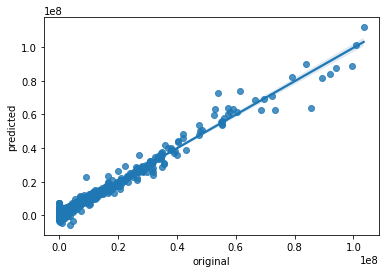

In [ ]:
#grafico predicted vs original

import seaborn as sns
sns.regplot(x='original', y='predicted', data=df4)
plt.show()


Analyzing the predicted data against the original data, we observe that:

- the predicted data fit the original data very well, as can be visually observed from the graph 
- our model assigns more value to players who are very good at dribbling, we note how our model overestimates Messi's value by 22 mln. 
- our model assigns a lot of value to goalkeepers, overestimating alisson and donnarumma by a few million. 
- Instead, it tends to value less the players with greater defensive qualities (rudiger and marquinhos)